# Hacker Stats Exercises
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<a id=1><a/>

## 1. Write a function that returns the result of a coin flip.

### Instructions

1. Take the np.random.randint(1,7) from the notebok, which returns a 1,2,3,4,5, or 6
2. Alter it so that it returns a 0 or 1.
3. Wrap this code in a function, called flip_coin that returns a `0` or `1`.
4. run the assert cell below, if nothing happens you have defined the function correctly, it can only return a 1 or a 0.

In [2]:
def flip_coin():
    return np.random.randint(0,2)
flip_coin()

0

In [15]:
assert flip_coin() == (1 or 0)

<br>
<br>
<br>

## 2. Write a function that handles the game logic

### Instructions

1. define function so that it takes 1 argument,`prev_step`.
2. The function should define a new value called `next_step`
3. flip a coin, we built a function for this in [1](#1)
3. Use if statemenets that rely on result of coin flip to alter `init_step` and save result to `next_step`.
4. `if coin == 0`
  > `next_step` should increase `prev_step` by 1
5. `else`
  > `next_step` should decrease `prev_step` by 1
6. Outside of if blocks, function should now return `next_step`.
7. Run assert cell to check work.

In [4]:
def game_logic(prev_step):
    coin = flip_coin()  
    if coin == 0:
        next_step = prev_step + 1
    else:
        next_step = max(0, prev_step - 1)

    return next_step

In [12]:
assert game_logic(5) == (4 or 6)

<br>
<br>
<br>

## 3. Write a function that creates a `random walk`

### Instructions

1. define function `build_random_walk` that it takes 1 argument, the `num_steps` you want to take in your random_walk.
2. The function should define a python list of lenght 1 called `rand_walk`.
3. `rand_walk` should only contain a single value, — `0`, which will be our first `prev_step`.
4. Build a for loop that loops as many times as `num_steps`, `range()` will prove useful.
5. define `prev_step` by grabbing the last value of `rand_walk` ... `some_list[-1]`, this value will change as we build out the `rand_walk`.
6. Pass `prev_step` to `game_logic()`, save the output as `next_step
7. Append `next_step` to the end of `rand_walk`
8. Verify that on each iteration of the for loop, `prev_step` is equal to the `next_step` from previous iteration.
9. Outside of the loop, return `rand_walk` of length `num_steps + 1` (the starting 0 increases the length)

In [20]:
def build_random_walk(num_steps):    
    rand_walk = [0]
    for coin_flip in range(num_steps):
        curr_step = rand_walk[-1]
        next_step = game_logic(curr_step)
        rand_walk.append(next_step)
        
    return rand_walk

In [21]:
assert len(build_random_walk(10)) == 11
assert len(build_random_walk(5)) == 6
assert len(build_random_walk(100)) == 101

<br>
<br>
<br>

## 4. Write a function that creates a `random walk`

### Instructions

1. define function `build_random_walk` that it takes 1 argument, the `num_steps` you want to take in your random_walk.
2. The function should define a python list of lenght 1 called `rand_walk`.
3. `rand_walk` should only contain a single value, — `0`, which will be our first `prev_step`.
4. Build a for loop that loops as many times as `num_steps`, `range()` will prove useful.
5. define `prev_step` by grabbing the last value of `rand_walk` ... `some_list[-1]`, this value will change as we build out the `rand_walk`.
6. Pass `prev_step` to `game_logic()`, save the output as `next_step
7. Append `next_step` to the end of `rand_walk`
8. Verify that on each iteration of the for loop, `prev_step` is equal to the `next_step` from previous iteration.
9. Outside of the loop, return `rand_walk` of length `num_steps + 1` (the starting 0 increases the length)

In [22]:
def simulate_games(num_sims):    
    all_random_walks = []
    for simulation in range(num_sims):
        rand_walk = build_random_walk(num_steps = 100)
        all_random_walks.append(rand_walk)
        
    return all_random_walks

In [23]:
assert len(simulate_games(10)) == 10
assert len(simulate_games(5)) == 5
assert len(simulate_games(1000)) == 1000

## 5. Visualize Random Walks

I've provided the code to plot the data, pass the appropriate data to each function and look at the print outs!

### Instructions
1. Use the `prepare_data` function to prepare the output of `simulate_games()` for plotting.
2. Pass the `prepared_data` into `plot_distibution` 
3. Pass the `prepared_data` into `plot_all_walks()`
4. After plotting all_Walks, you'll notice a chart that looks different from the one in the class notebook.
5. Can you identify what function we need to modify so that the random walk can never dip below the x axis?
6. Make the appropriate change and run the code again!
#### 7. Add `next_step = max(0, prev_step - 1)` to `game_logic`

In [142]:
def prepare_data(all_walks):
    
    """Transposes numpy array version of python list, for easier plotting"""
    
    np_walks = np.array(all_walks)
    np_walks_t = np.transpose(np_walks)
    return np_walks_t 


def plot_distribution(all_Walks):
    '''plots a distribution of numbers, in this case the final step of each random walk'''
    
    plt.figure()
    ax = plt.gca()
    final_steps = all_walks[-1]
    ax.hist(final_steps)
    ax.set_title('Dice Game Outcomes')
    ax.set_xlabel('Game Outcome')
    ax.set_ylabel('# Games')
    plt.show()
    
    
def plot_all_walks(all_walks):
    '''This will plot every single random walk in a set of all_walks'''
    
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_title("All Random Walks")
    ax.set_xlabel("Dice Roll (Time)")
    ax.set_ylabel("Steps Taken (Random Walk)")
    ax.plot(all_walks)
    plt.show()

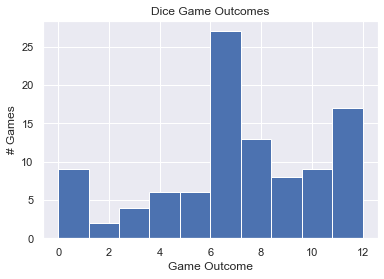

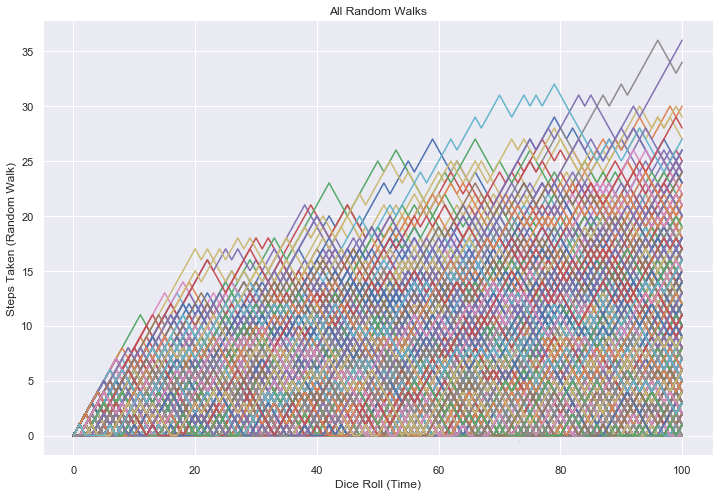

In [143]:
all_walks = simulate_games(1000)
all_walks_t = prepare_data(all_walks)
plot_distribution(all_walks_t)
plot_all_walks(all_walks_t)